In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Import the MNIST Dataset

In [2]:
from keras.datasets import mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

C:\Users\Ming\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Ming\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ming\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ming\Anaconda3\lib\site-packages\tensorflow\python\framework\dtyp

In [3]:
print(Xtrain.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))

(60000, 28, 28)
Training Set: 60000 images of 28 x 28 pixels each


In [4]:
print(Xtest.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

(10000, 28, 28)
Training Set: 10000 images of 28 x 28 pixels each


#### Attempt to display some images in the dataset

#### Training Set

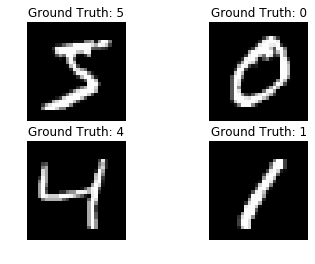

In [5]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytrain[i]) )
plt.show()

#### Test Set

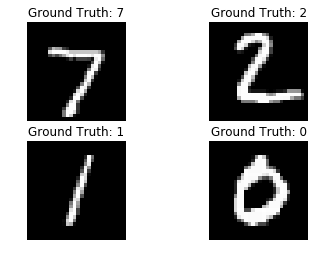

In [6]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytest[i]) )
plt.show()    

#### Preprocessing

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [15]:
Xtrain_reshape = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest_reshape = Xtest.reshape(Xtest.shape[0],-1)

scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain_reshape)
Xtrain_reshape = scaler.transform(Xtrain_reshape)
Xtest_reshape = scaler.transform(Xtest_reshape)

### A. Building different models for the same problem

### <font color=red>Takeaway 1 <br> <br> Using different models for the same problem: Logistic Regression, Random Forest, MLP, CNNs</font>

#### 1. Logistic Regression (Classifier)

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(verbose=2)
LR.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
#LR.fit(Xtrain_reshape,Ytrain)
print("Training Accuracy: " + str(accuracy_score(LR.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(LR.predict(Xtest_reshape),Ytest)))

C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]Training Accuracy: 0.94025
Test Accuracy: 0.9112


#### 2. Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
RandForest = RandomForestClassifier(n_estimators=20,max_depth=8,min_samples_leaf=2)
RandForest.fit(Xtrain_reshape[:1000,:],Ytrain[:1000])
print("Training Accuracy: " + str(accuracy_score(RandForest.predict(Xtrain_reshape[:1000,:]),Ytrain[:1000])))
print("Test Accuracy: " + str(accuracy_score(RandForest.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.987
Test Accuracy: 0.8368


#### <font color=red>Takeaway 2 <br> <br> Amount of Training Input Data <br> <br> More data gets you more accurate results.</font>

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200,max_depth=25,min_samples_leaf=7)
RF.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
print("Training Accuracy: " + str(accuracy_score(RF.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(RF.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.9803
Test Accuracy: 0.9396


#### 3. Multilayer Perceptron Classifier

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
NN = keras.Sequential()
NN.add(Dense(50, activation='relu'))
NN.add(Dropout(0.7))
NN.add(Dense(10, activation='softmax'))

NN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
NN.fit(Xtrain_reshape[:10000,:],Ytrain[:10000],batch_size=200,epochs=100)

Epoch 1/100
10000/10000 [==============================] - 25s 2ms/step - loss: 2.0204 - acc: 0.3975
Epoch 2/100
10000/10000 [==============================] - 0s 25us/step - loss: 1.4265 - acc: 0.6867
Epoch 3/100
10000/10000 [==============================] - 0s 23us/step - loss: 1.0082 - acc: 0.7927
Epoch 4/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.7634 - acc: 0.8418
Epoch 5/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.6283 - acc: 0.8674
Epoch 6/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.5439 - acc: 0.8795
Epoch 7/100
10000/10000 [==============================] - 0s 21us/step - loss: 0.4865 - acc: 0.8888
Epoch 8/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.4445 - acc: 0.8960
Epoch 9/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.4125 - acc: 0.9006
Epoch 10/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.3872 - a

10000/10000 [==============================] - 0s 36us/step - loss: 0.1007 - acc: 0.9741
Epoch 81/100
10000/10000 [==============================] - 0s 28us/step - loss: 0.0991 - acc: 0.9750
Epoch 82/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0978 - acc: 0.9757
Epoch 83/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.0962 - acc: 0.9765
Epoch 84/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.0952 - acc: 0.9767
Epoch 85/100
10000/10000 [==============================] - 0s 37us/step - loss: 0.0937 - acc: 0.9772
Epoch 86/100
10000/10000 [==============================] - 0s 30us/step - loss: 0.0926 - acc: 0.9777
Epoch 87/100
10000/10000 [==============================] - 0s 30us/step - loss: 0.0914 - acc: 0.9777
Epoch 88/100
10000/10000 [==============================] - 0s 27us/step - loss: 0.0900 - acc: 0.9782
Epoch 89/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.0889 - acc: 

In [133]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(NN.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(NN.predict_classes(Xtrain_reshape[:1000,:]),Ytrain[:1000])))

NN
Training Accuracy: 0.9837
Test Accuracy: 0.98


#### <font color=red>Takeaway 3 <br> <br> Do not mix training and test data!!!</font>

In [135]:
NN_deep = keras.Sequential()
NN_deep.add(Dense(50, activation='relu'))
NN_deep.add(Dense(30, activation='relu'))
NN_deep.add(Dense(10, activation='softmax'))

NN_deep.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.002),metrics=['accuracy'])
NN_deep.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 20s 337us/step - loss: 0.4106 - acc: 0.8806
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1834 - acc: 0.9474
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1398 - acc: 0.9593
Epoch 4/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1117 - acc: 0.9666
Epoch 5/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0940 - acc: 0.9719
Epoch 6/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0815 - acc: 0.9755
Epoch 7/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0696 - acc: 0.9788
Epoch 8/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0628 - acc: 0.9811
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0556 - acc: 0.9827: 0s - loss: 0.0517 - acc
Epoch 10/100
60000/60000 [==============================] - 1s 2

60000/60000 [==============================] - 2s 28us/step - loss: 0.0014 - acc: 0.9997
Epoch 80/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0084 - acc: 0.9972
Epoch 81/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0159 - acc: 0.9951
Epoch 82/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0098 - acc: 0.9969
Epoch 83/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0037 - acc: 0.9988
Epoch 84/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0025 - acc: 0.9993
Epoch 85/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0045 - acc: 0.9987: 0s - loss: 0.0043 - acc: 0.998
Epoch 86/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0083 - acc: 0.9971
Epoch 87/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0098 - acc: 0.9970
Epoch 88/100
60000/60000 [==============================] - 1s 

In [ ]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(NN_deep.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(NN_deep.predict_classes(Xtrain_reshape[:1000,:]),Ytrain[:1000])))

#### <font color=red>Takeaway 4 <br> <br> If you're not careful... your model can overfit</font>

#### <font color=red>A few things can be done to prevent overfitting: hyperparameter optimization, reducing the learning_rate, reducing the network size/parameters used, dropout </font>

#### <font color=red>For this instance, we attempt dropout to randomly set the nodes in the network to zero.</font>

In [117]:
MLP = keras.Sequential()
MLP.add(Dense(50, activation='relu'))
MLP.add(Dropout(0.7))
MLP.add(Dense(30, activation='relu'))
MLP.add(Dropout(0.7))
MLP.add(Dense(10, activation='softmax'))

MLP.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
MLP.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 28s 474us/step - loss: 1.1415 - acc: 0.6900
Epoch 2/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.4007 - acc: 0.8941
Epoch 3/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3093 - acc: 0.9146
Epoch 4/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2681 - acc: 0.9250
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2419 - acc: 0.9323
Epoch 6/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2224 - acc: 0.9373
Epoch 7/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2065 - acc: 0.9419
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1931 - acc: 0.9454
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1822 - acc: 0.9487
Epoch 10/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1724 -

60000/60000 [==============================] - 1s 23us/step - loss: 0.0239 - acc: 0.9946
Epoch 82/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0231 - acc: 0.9952
Epoch 83/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0225 - acc: 0.9954
Epoch 84/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0222 - acc: 0.9954
Epoch 85/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0215 - acc: 0.9957
Epoch 86/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0208 - acc: 0.9960
Epoch 87/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0206 - acc: 0.9955
Epoch 88/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0199 - acc: 0.9962
Epoch 89/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0195 - acc: 0.9965
Epoch 90/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0192 - acc: 

In [136]:
print("MLP")
print("Training Accuracy: " + str(accuracy_score(MLP.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(MLP.predict_classes(Xtest_reshape),Ytest)))

MLP
Training Accuracy: 0.9974
Test Accuracy: 0.9679


In [118]:
MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             multiple                  39250     
_________________________________________________________________
dropout_18 (Dropout)         multiple                  0         
_________________________________________________________________
dense_54 (Dense)             multiple                  1530      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
_________________________________________________________________
dense_55 (Dense)             multiple                  310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


#### 4. Convolutional Neural Network Classifier

In [92]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
CNN = keras.Sequential()
CNN.add(Conv2D(12, (3, 3), activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2], 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(16, (4, 4), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(16, (3, 3), activation='relu'))
CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))
CNN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
CNN.fit(Xtrain_reshape.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)),Ytrain,batch_size=100,epochs=30)

Epoch 1/30
60000/60000 [==============================] - 47s 786us/step - loss: 0.9403 - acc: 0.7211
Epoch 2/30
60000/60000 [==============================] - 25s 422us/step - loss: 0.2838 - acc: 0.9155
Epoch 3/30
60000/60000 [==============================] - 24s 392us/step - loss: 0.2044 - acc: 0.9389
Epoch 4/30
60000/60000 [==============================] - 25s 411us/step - loss: 0.1610 - acc: 0.9510
Epoch 5/30
60000/60000 [==============================] - 24s 395us/step - loss: 0.1349 - acc: 0.9590
Epoch 6/30
60000/60000 [==============================] - 25s 419us/step - loss: 0.1166 - acc: 0.9644
Epoch 7/30
60000/60000 [==============================] - 28s 468us/step - loss: 0.1041 - acc: 0.9681
Epoch 8/30
60000/60000 [==============================] - 26s 438us/step - loss: 0.0949 - acc: 0.9712
Epoch 9/30
60000/60000 [==============================] - 25s 413us/step - loss: 0.0877 - acc: 0.9734
Epoch 10/30
60000/60000 [==============================] - 27s 450us/step - loss: 

In [121]:
print("CNN")
print("Training Accuracy: " + str(accuracy_score(CNN.predict_classes( Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)  ),Ytrain)))
print("Test Accuracy: " + str(accuracy_score(CNN.predict_classes( Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)  ),Ytest)))

CNN
Training Accuracy: 0.9878333333333333
Test Accuracy: 0.9857


In [98]:
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        3088      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1450      
Total para

In [104]:
CNN.save('CNN.h5')
#CNN_load = tf.keras.models.load_model('CNN.h5')
#print("Training Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)  ),Ytrain)))
#print("Test Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)  ),Ytest)))

### Machine Learning Concepts

#### <font color=red> 5. Visualising some of the incorrect predictions </font>

In [141]:
wrong_indices = np.where(np.not_equal(MLP.predict_classes(Xtest_reshape), Ytest))

In [142]:
Ytest[wrong_indices]

array([2, 4, 0, 2, 9, 6, 4, 9, 2, 5, 6, 3, 8, 1, 3, 5, 7, 4, 5, 7, 0, 8,
       5, 1, 6, 6, 5, 7, 6, 2, 4, 3, 7, 6, 6, 9, 7, 9, 4, 9, 8, 8, 7, 5,
       9, 8, 7, 7, 7, 8, 3, 4, 9, 6, 2, 0, 5, 3, 9, 8, 0, 4, 7, 2, 6, 8,
       9, 7, 5, 9, 5, 6, 2, 0, 5, 8, 7, 1, 0, 7, 7, 5, 5, 4, 4, 3, 6, 4,
       6, 9, 2, 5, 8, 9, 0, 5, 9, 8, 9, 9, 6, 8, 6, 2, 4, 5, 9, 9, 7, 3,
       9, 6, 8, 9, 7, 4, 5, 8, 7, 3, 3, 4, 9, 9, 8, 1, 4, 5, 6, 7, 0, 2,
       9, 4, 6, 2, 9, 6, 4, 5, 8, 8, 7, 9, 2, 8, 5, 8, 7, 6, 4, 2, 2, 0,
       7, 6, 9, 5, 5, 1, 4, 3, 7, 0, 8, 9, 7, 8, 2, 2, 7, 1, 9, 2, 5, 4,
       2, 9, 9, 9, 8, 9, 3, 3, 8, 7, 2, 9, 6, 2, 6, 5, 4, 8, 2, 3, 8, 3,
       4, 8, 9, 4, 0, 8, 2, 8, 7, 3, 8, 3, 2, 3, 6, 1, 1, 1, 8, 7, 4, 3,
       8, 4, 7, 7, 4, 4, 4, 5, 3, 5, 3, 5, 3, 3, 7, 3, 8, 3, 9, 0, 9, 3,
       8, 0, 6, 9, 9, 9, 1, 5, 2, 7, 7, 0, 3, 8, 9, 0, 8, 8, 9, 6, 2, 0,
       3, 8, 4, 6, 5, 2, 2, 8, 8, 3, 5, 3, 3, 1, 8, 1, 5, 2, 2, 6, 2, 3,
       3, 6, 0, 2, 8, 5, 8, 4, 8, 4, 2, 7, 7, 7, 8,

In [143]:
MLP.predict_classes(Xtest_reshape)[wrong_indices]

array([3, 9, 9, 9, 8, 5, 2, 8, 7, 3, 0, 7, 2, 2, 9, 3, 3, 9, 8, 9, 2, 9,
       4, 2, 0, 5, 8, 8, 8, 3, 6, 2, 8, 1, 5, 4, 2, 4, 9, 5, 3, 3, 9, 3,
       7, 3, 9, 1, 9, 7, 5, 2, 8, 4, 3, 6, 9, 7, 3, 0, 7, 2, 2, 8, 4, 3,
       8, 5, 7, 3, 8, 3, 0, 9, 8, 9, 2, 7, 5, 9, 9, 3, 4, 8, 9, 1, 0, 9,
       1, 4, 3, 8, 0, 6, 2, 8, 1, 3, 8, 7, 4, 3, 8, 4, 9, 3, 4, 7, 1, 5,
       5, 1, 5, 4, 1, 7, 3, 0, 3, 2, 2, 0, 7, 1, 5, 2, 6, 1, 5, 9, 9, 3,
       1, 9, 0, 1, 1, 4, 9, 0, 5, 5, 8, 3, 8, 3, 3, 4, 2, 5, 6, 8, 3, 6,
       1, 2, 4, 6, 3, 2, 2, 5, 1, 8, 5, 7, 9, 2, 3, 7, 9, 7, 7, 8, 6, 6,
       8, 7, 7, 4, 4, 4, 2, 2, 7, 3, 7, 8, 5, 8, 2, 6, 9, 4, 4, 5, 7, 5,
       6, 3, 6, 9, 8, 6, 8, 4, 1, 2, 5, 5, 7, 5, 4, 6, 8, 5, 4, 8, 3, 7,
       2, 7, 4, 9, 0, 9, 9, 3, 9, 3, 8, 9, 9, 9, 3, 9, 3, 9, 3, 6, 0, 5,
       9, 2, 2, 3, 4, 7, 3, 3, 6, 2, 2, 9, 5, 1, 5, 8, 5, 7, 4, 4, 7, 5,
       7, 3, 8, 4, 8, 7, 7, 9, 9, 8, 8, 2, 2, 8, 1, 8, 8, 8, 8, 4, 4, 9,
       5, 4, 6, 4, 5, 8, 0, 8, 6, 9, 8, 2, 2, 2, 5,

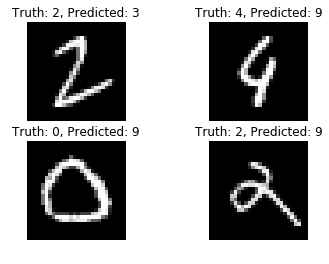

In [156]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i]]) + ", Predicted: " +str(MLP.predict_classes(Xtest_reshape)[wrong_indices[0][i]])  )
plt.show()

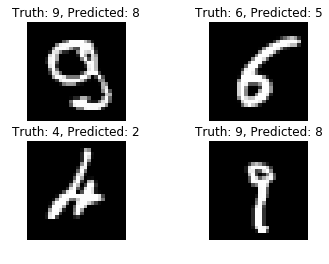

In [158]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][4+i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i+4]]) + ", Predicted: " +str(MLP.predict_classes(Xtest_reshape)[wrong_indices[0][4+i]])  )
plt.show()

#### <font color=red> Neural network parameters: Optimisers, number of epoches, network parameters, optimisers, batch size, different types of layers, convolutional layers VS dense layers </font>

#### <font color=red> Machine Learning concepts: Backpropagation, global vs local minima, explainability, hyperparameter optimization, activation functions, probability outputs </font>

#### For further reference: Stanford CS231n Convolutional Neural Networks, 2 Blue 1 Brown Neural Networks, Tensorflow Documentation